In [123]:
from AZOG import *

In [124]:

ReactorCore=CoreInside(TemperatureFuel=[700,750,700],TemperatureModerator=np.array([300,300,300,300,300,300]),Power=3200e6,Precursor=4100.2,Pressure=13e6)    
UpperPlenum=UpperPlenum(TempUpperPlenum=500)
LowerPlenum=LowerPlenum(TempLowerPlenum=400)

Hotleg=Hotleg(TempHotLeg=600)  
ColdLeg=ColdLeg(TempColdLeg=355)  

InletPlenum=InletPlenum(Temperature=Hotleg.Thl,pressure=13e6)

PrimaryFluidLump=PrimaryFluidLump(Pressure=13e6,PrimaryLump1Temperature=InletPlenum.Tpi,PrimaryLump2Temperature=InletPlenum.Tpi)
MetalLump=MetalLump(MetalLump1Temperature=310,MetalLump2Temperature=300)
SecondaryFluidLump=SecondaryFluidLump(Pressure=13e6,inletTemperature=300,FeedWaterFlowRate=200,EvaporationRate=2000,SteamExitRate=2000)

100%|██████████| 2000/2000 [00:00<00:00, 2046.19it/s]


Operation Case:

feed water flow rate suddenly goes lower in the steam generator 



Reactor will Operate at 3200MW thermal for 95 Sec and then shut down 


Basic Infromation:

RPCP exit temperature =300  
                                                        
Flow Rate=18899.68208 Kg/sec

Reactor Dimension

Height =   4.38912    meter 

Diameter=  3.62712    meter

Pressure=10e6 Pa


In [125]:
#                                                         """ Main Simulation Part"""
t=0
dt=0.001
Time=[]
T1=[]
T2=[]
T3=[]
T=[]
p=[]
Temp1=[]
Temp2=[]
Temp3=[]

Tmm1=[]
Tmm2=[]
Tmm3=[]
Tmm4=[]

Tpp1=[]
Tpp2=[]
Tmetal1=[]
Tmetal2=[]

logo()

while t<100:
    


    
    '''Recirculation flow rate should be calculated here '''
    Tf1=ReactorCore.integrator(ReactorCore.DTf1,[],ReactorCore.Tf1,time_step=dt)
    Tf2=ReactorCore.integrator(ReactorCore.DTf2,[],ReactorCore.Tf2,time_step=dt)
    Tf3=ReactorCore.integrator(ReactorCore.DTf3,[],ReactorCore.Tf3,time_step=dt)
    Tmo1=ReactorCore.integrator(ReactorCore.DTm01,argsforfunction=[LowerPlenum],intitial_cond=ReactorCore.Tmo1,time_step=dt)
    Tmo2=ReactorCore.integrator(ReactorCore.DTm02,[],ReactorCore.Tmo2,time_step=dt)
    Tmo3=ReactorCore.integrator(ReactorCore.DTm03,[],ReactorCore.Tmo3,time_step=dt)
    Tmo4=ReactorCore.integrator(ReactorCore.DTm04,[],ReactorCore.Tmo4,time_step=dt)
    Tmo5=ReactorCore.integrator(ReactorCore.DTm05,[],ReactorCore.Tmo5,time_step=dt)
    Tmo6=ReactorCore.integrator(ReactorCore.DTm06,[],ReactorCore.Tmo6,time_step=dt)

    TempFuel=Tf1+Tf2+Tf3
    TempModerator=Tmo1+Tmo2+Tmo3+Tmo4+Tmo5+Tmo6
    
    Precursor=ReactorCore.integrator(ReactorCore.DPrecoursor,[],intitial_cond=ReactorCore.Precursor,time_step=dt)
    Power=ReactorCore.integrator(ReactorCore.DPowerRatio,[],intitial_cond=ReactorCore.PowerRatio,time_step=dt)

    Thl=Hotleg.integrator(Hotleg.DThl,argsforfunction=[UpperPlenum],intitial_cond=Hotleg.Thl,time_step=dt)
    Tcl=ColdLeg.integrator(ColdLeg.DTcl,argsforfunction=[PrimaryFluidLump.Tp2],intitial_cond=ColdLeg.Tcl,time_step=dt)

    Tup=UpperPlenum.integrator(UpperPlenum.DTup,[ReactorCore],intitial_cond=UpperPlenum.Tup,time_step=dt)
    Tlp=LowerPlenum.integrator(LowerPlenum.DTlp,[ColdLeg],intitial_cond=LowerPlenum.Tlp,time_step=dt)


    Tpi=InletPlenum.integrator(InletPlenum.DTpi,[],intitial_cond=InletPlenum.Tpi,time_step=dt)

    Tp1=PrimaryFluidLump.integrator(PrimaryFluidLump.DTp1,argsforfunction=[InletPlenum,MetalLump],intitial_cond=PrimaryFluidLump.Tp1,time_step=dt)
    Tp2=PrimaryFluidLump.integrator(PrimaryFluidLump.DTp2,[MetalLump],intitial_cond=PrimaryFluidLump.Tp2,time_step=dt)

    Tm1=MetalLump.integrator(MetalLump.DTm1,argsforfunction=[PrimaryFluidLump,SecondaryFluidLump],intitial_cond=MetalLump.Tm1,time_step=dt)
    Tm2=MetalLump.integrator(MetalLump.DTm2,argsforfunction=[PrimaryFluidLump,SecondaryFluidLump],intitial_cond=MetalLump.Tm2,time_step=dt)

    #Pressure=SecondaryFluidLump.integrator(SecondaryFluidLump.DPressure,argsforfunction=[MetalLump,PrimaryFluidLump],intitial_cond=SecondaryFluidLump.P,time_step=dt)

                                    
    ReactorCore.PowerRatio=Power
    ReactorCore.Precursor=Precursor
    ReactorCore.Reacivity(TempFuel,TempModerator)

    ReactorCore.Tf1=Tf1
    ReactorCore.Tf2=Tf2
    ReactorCore.Tf3=Tf3

    ReactorCore.Tmo1=Tmo1
    ReactorCore.Tmo2=Tmo2   
    ReactorCore.Tmo3=Tmo3
    ReactorCore.Tmo4=Tmo4
    ReactorCore.Tmo5=Tmo5
    ReactorCore.Tmo6=Tmo6

    Hotleg.Thl=Thl
    ColdLeg.Tcl=Tcl

    UpperPlenum.Tup=Tup
    LowerPlenum.Tlp=Tlp


    InletPlenum.Tpi=Tpi
    InletPlenum.Theta=Thl

    PrimaryFluidLump.Tp1=Tp1
    PrimaryFluidLump.Tp2=Tp2
    #SecondaryFluidLump.P=Pressure

    MetalLump.Tm1=Tm1
    MetalLump.Tm2=Tm2
   
   
    if t>20 and t<40:
        ReactorCore.ExternalReactivity=0.001
    elif t>40 and t<60:
        ReactorCore.ExternalReactivity=-0.01
    else:
        ReactorCore.ExternalReactivity=0
    
    if t>95:
        ReactorCore.NominalPower=0
      
    
    T1.append(Tmo1)
    T2.append(Tmo3)
    T3.append(Tmo5)

    Temp1.append(Tf1)
    Temp2.append(Tf2)
    Temp3.append(Tf3)

    Tmm1.append(Thl)
    Tmm2.append(Tpi)

    Tmm3.append(Tup)
    Tmm4.append(Tlp)

    Tpp1.append(Tp1)
    Tpp2.append(Tp2)
    Tmetal1.append(Tm1)
    Tmetal2.append(Tm2)
    

    T.append(t)

    p.append(Power)



    #SubCooledRegion.Tstat=Tstat


    t=dt+t



       #val=TempModerator/6
    #print(PrimaryCoolantPump.Qp)
    #print(PropsSI("P",'T',val,'Q',0,'water'))
    #print("%.6f" %(InletPlenum.Temperature-273),"   ",'%.6f'%(PrimaryLump.Tp1-273))


          #                      #       
         ####                  ####      
        $$$$$$                $$$$$$     
      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
  %%%%%%%%@@@%%%%%%%%%%%%%%%%%%@@@%%%%%%%%%
%%%%%%%@@@@@@@@%%%%%%%%%%%%%%@@@@@@@@%%%%%%%%
%%%%%%%%@@@@@@%%%%%%%%%%%%%%%%@@@@@@%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
     %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
       %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 
         %%%%%%%%%%%%%%%%%%%%%%%%%%%
             %%%%%%%%%%%%%%%%%%%%
                 A   Z   O   G
    A Nuclear Power Plant Simulation code 



 
	   PROGRAMMER:
EBNY WALID AHAMMED 
Undergrad Student --Level 4 term 2
Dept of Nuclear Engineering
University of Dhaka


Text(0, 0.5, 'Power Level')

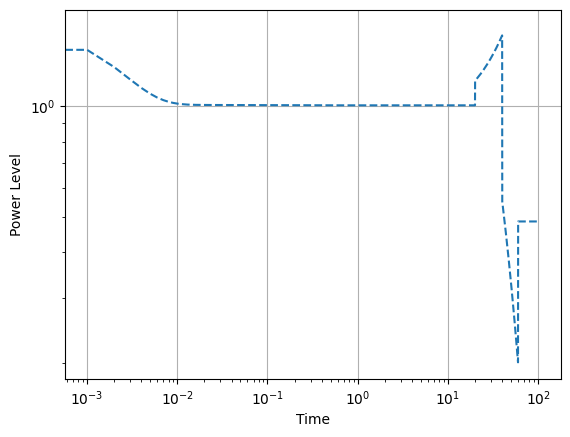

In [126]:

plt.loglog(T,p,"--")
plt.grid()
plt.xlabel("Time")
plt.ylabel('Power Level')


Text(0, 0.5, 'Power Level')

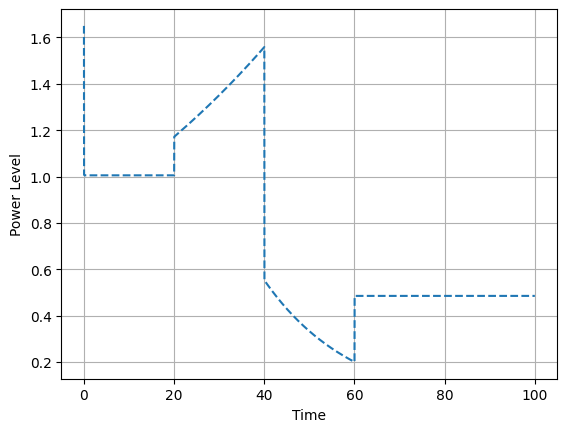

In [127]:
plt.plot(T,p,"--")
plt.grid()
plt.xlabel("Time")
plt.ylabel('Power Level')

Text(0, 0.5, ' Fuel Temperature')

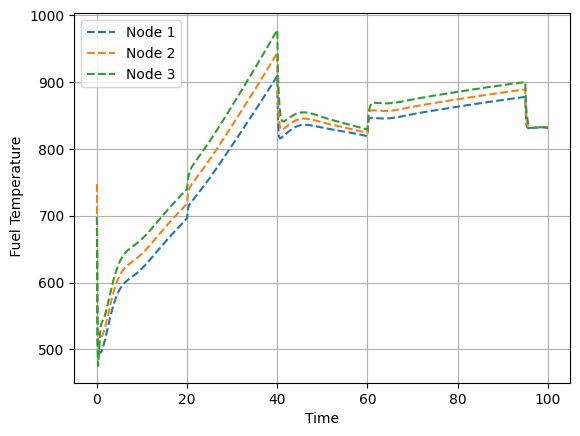

In [128]:
plt.plot(T,Temp1,'--')
plt.plot(T,Temp2,'--')
plt.plot(T,Temp3,'--')
plt.grid()
plt.legend(['Node 1','Node 2', 'Node 3'])
plt.xlabel("Time")
plt.ylabel(' Fuel Temperature')

Text(0, 0.5, 'Coolant Temperature')

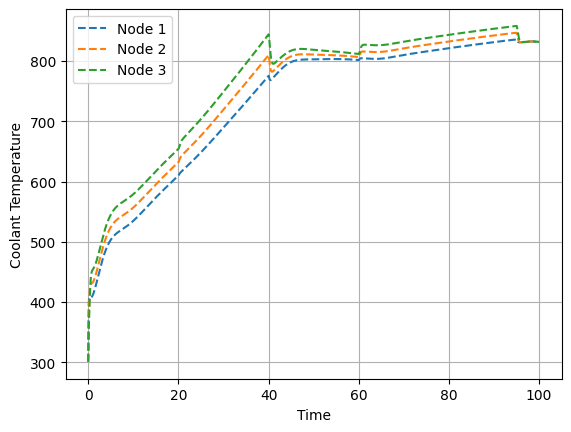

In [129]:
plt.plot(T,T1,'--')
plt.plot(T,T2,'--')
plt.plot(T,T3,'--')
plt.grid()
plt.legend(['Node 1','Node 2', 'Node 3'])
plt.xlabel("Time")
plt.ylabel('Coolant Temperature')

Text(0, 0.5, 'Fuel & Moderator\nTemperature\ndifference between\n 3rd Node')

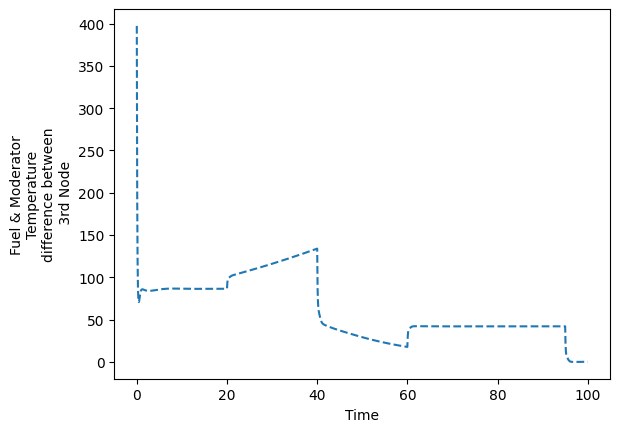

In [130]:

difference=np.array(Temp3)-np.array(T3)
plt.plot(T,difference,'--')
plt.xlabel("Time")
plt.ylabel('Fuel & Moderator\nTemperature\ndifference between\n 3rd Node')

Text(0, 0.5, 'Temperature')

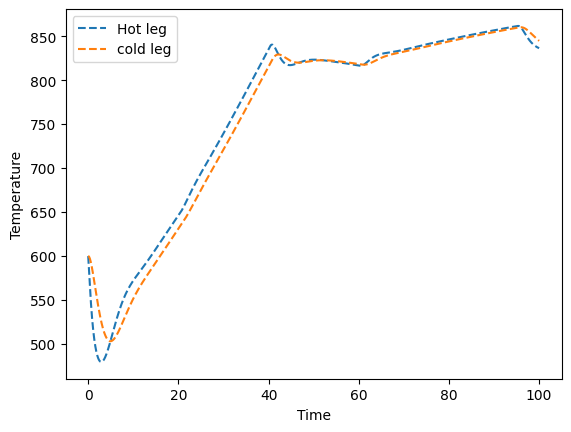

In [131]:
plt.plot(T,Tmm1,'--')
plt.plot(T,Tmm2,'--')
plt.legend(['Hot leg','cold leg'])
plt.xlabel("Time")
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

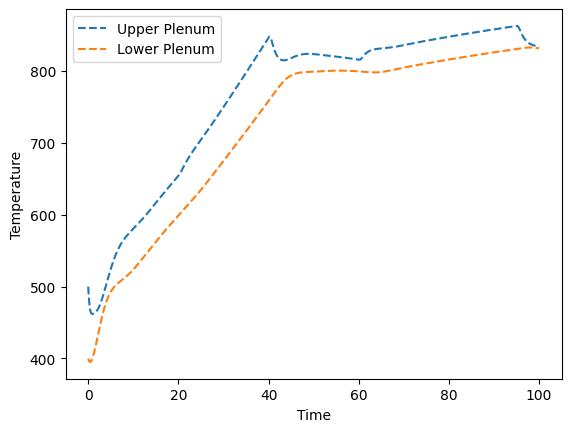

In [132]:
plt.plot(T,Tmm3,'--')
plt.plot(T,Tmm4,'--')
plt.legend(['Upper Plenum','Lower Plenum'])
plt.xlabel("Time")
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

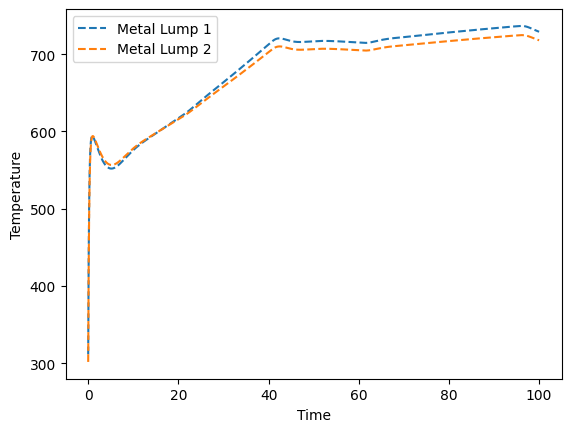

In [133]:
plt.plot(T,Tmetal1,'--')
plt.plot(T,Tmetal2,'--')
plt.legend(['Metal Lump 1','Metal Lump 2'])
plt.xlabel("Time")
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

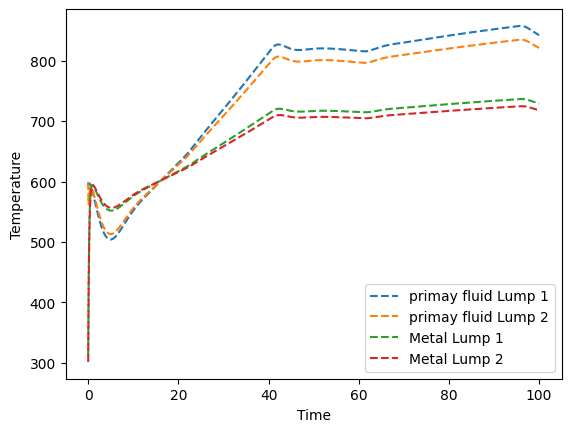

In [134]:
plt.plot(T,Tpp1,'--')
plt.plot(T,Tpp2,'--')
plt.plot(T,Tmetal1,'--')
plt.plot(T,Tmetal2,'--')
plt.legend(['primay fluid Lump 1','primay fluid Lump 2','Metal Lump 1','Metal Lump 2'])
plt.xlabel("Time")
plt.ylabel('Temperature')